In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [19]:
def pca(X, D):
    """
    PCA
    Input:
        X - An (1024, 1024) numpy array
        D - An int less than 1024. The target dimension
    Output:
        X - A compressed (1024, 1024) numpy array
    """
    X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
    u, e, v = np.linalg.svd(np.dot(X.T, X))
    eigen = v.T[:, 0:D]
    final = np.dot(X, eigen)
    #return np.dot(final, eigen.T)
    return final

In [28]:
def sklearn_pca(X, D):
    """
    Your PCA implementation should be equivalent to this function.
    Do not use this function in your implementation!
    """
    X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
    from sklearn.decomposition import PCA
    p = PCA(n_components=D, svd_solver='full')
    trans_pca = p.fit_transform(X)
    var = p.explained_variance_ratio_
    return trans_pca, var

In [71]:
X = pd.read_csv("Data/BAL/normdataBAL0715.txt", sep = '\t', usecols=range(2,156))
df = X

In [22]:
anova_results = pd.DataFrame(index=df.index, columns=['F-value', 'p-value'])

for gene in df.index:
    group1 = df.loc[gene, df.columns.str.contains('NC')]
    group2 = df.loc[gene, df.columns.str.contains('SA')]
    group3 = df.loc[gene, df.columns.str.contains('notSA')]
    group4 = df.loc[gene, df.columns.str.contains('VSA')]
    f_value, p_value = stats.f_oneway(group1, group2, group3, group4)
    anova_results.loc[gene, 'F-value'] = f_value
    anova_results.loc[gene, 'p-value'] = p_value

In [23]:
alpha = 0.05
bh_corrected_pvals = multipletests(anova_results['p-value'], method='fdr_bh')[1]
filtered_genes = anova_results.index[bh_corrected_pvals < alpha]

In [26]:
filtered_df = df.loc[filtered_genes]
filtered_df.to_csv("filtered_data_BAL.csv")

In [55]:
var = filtered_df.iloc[730,:].to_numpy()
print(np.var(var))

0.10449887940630796


[0.27621597 0.09560059]


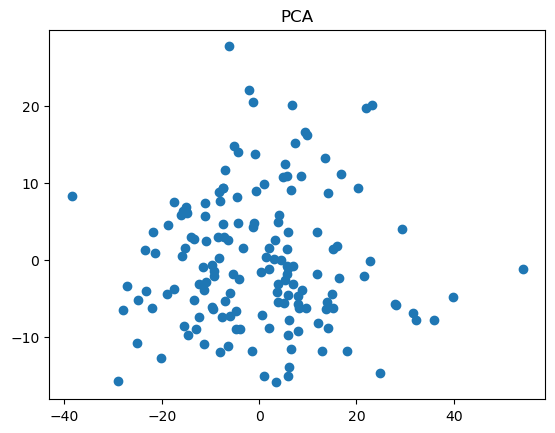

In [68]:
D = 2
pca_final=pca(filtered_df.T, D)
pca_sklearn, var=sklearn_pca(filtered_df.T, D)
print(var)

plt.scatter(pca_sklearn[:, 0], pca_sklearn[:, 1])
plt.title('PCA')
plt.show()

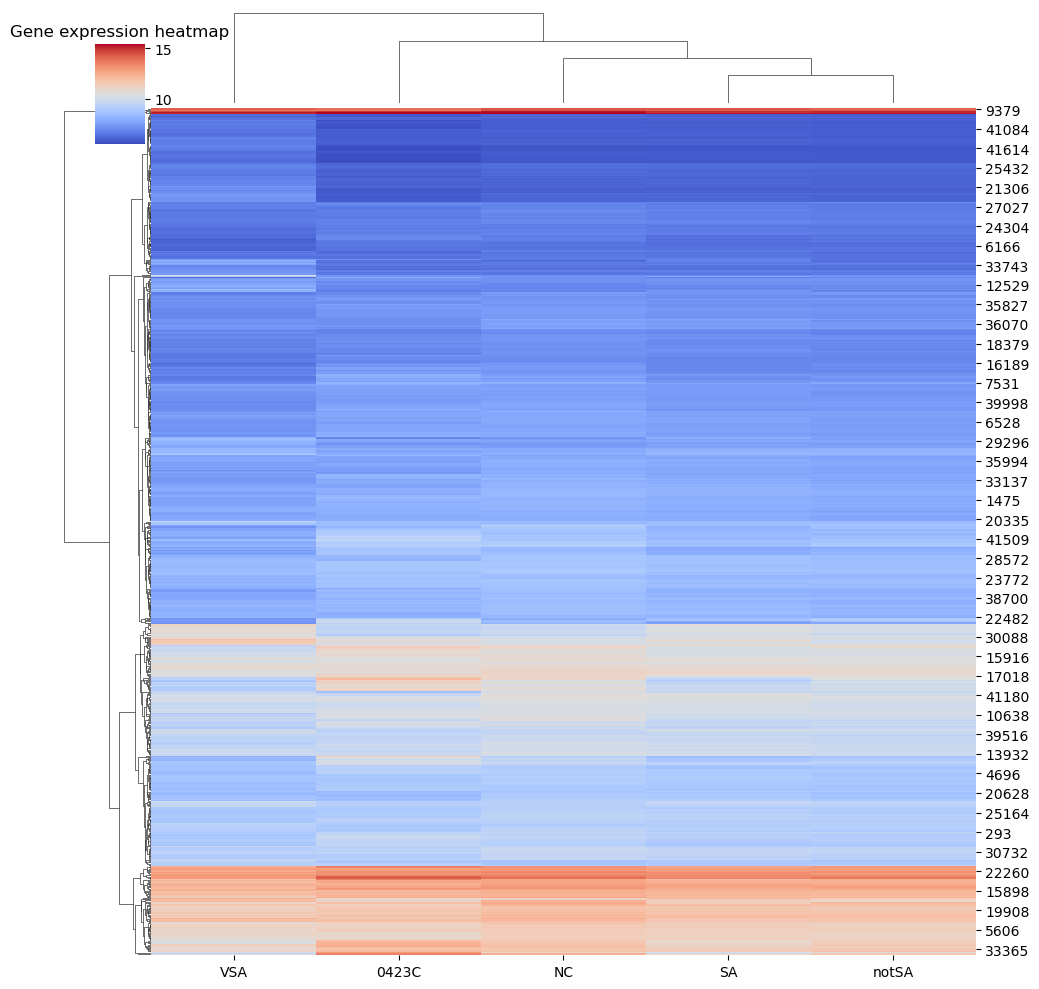

In [76]:
sample_labels = [col.split("_")[1] for col in filtered_df.columns if col.startswith("BAL")]

# Group the columns by the sample labels (NC, VSA, SA)
grouped_columns = filtered_df.groupby(sample_labels, axis=1)

# Calculate the average expression for each group
grouped_mean = grouped_columns.mean()

# Generate a heatmap using seaborn
sns.clustermap(grouped_mean, cmap="coolwarm", figsize=(10,10), dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.05, 0.85, 0.05, 0.1))

# Set the title of the heatmap
plt.title("Gene expression heatmap")

# Show the plot
plt.show()

# sns.clustermap(filtered_df, cmap="viridis", standard_scale=1, row_cluster=False, col_cluster=False)
# plt.xlabel("Samples")
# plt.ylabel("Genes")
# plt.show()

In [58]:
X = pd.read_csv("Data/BAL/normdataBAL0715_Variance.txt", sep = '\t', usecols=range(3,158))

,BAL_NC_0261T,BAL_NC_1221V,BAL_NC_1431G,BAL_NC_1524N,BAL_NC_1619Y,BAL_NC_1656E,BAL_NC_1701J,BAL_NC_1733W,BAL_NC_1924D,BAL_NC_1947P,...,BAL_SA_0996X,BAL_SA_1389H,BAL_SA_1726Z,BAL_SA_2261M,BAL_SA_2276Z,BAL_SA_2278D,BAL_SA_2280Q,BAL_SA_2288G,BAL_SA_2293Z,Variance
0,16.760,16.490,15.520,15.530,16.280,16.320,15.400,16.000,16.350,15.860,...,15.810,16.300,16.280,16.230,15.960,16.310,16.780,16.590,16.460,0.138451
1,5.548,5.590,5.758,5.833,5.703,5.541,5.887,5.606,5.460,5.616,...,6.102,6.096,6.249,6.406,6.265,6.329,6.200,6.248,6.004,0.151109
2,5.643,5.637,5.721,5.628,5.720,5.769,5.929,5.758,5.627,5.592,...,6.127,6.068,6.392,6.371,6.243,6.277,6.152,6.245,5.948,0.141681
3,5.456,5.774,5.763,5.794,5.762,5.835,5.881,5.531,5.661,5.624,...,6.119,5.895,6.323,6.348,6.157,6.249,6.205,6.190,6.017,0.130507
4,5.498,5.640,5.865,5.721,5.803,5.628,5.885,5.726,5.681,5.746,...,6.090,6.136,6.395,6.266,6.220,6.386,6.191,6.222,6.027,0.127236
5,5.556,5.598,5.845,5.508,5.882,5.628,5.908,5.727,5.561,5.596,...,6.221,5.969,6.323,6.249,6.359,6.362,6.259,6.264,6.001,0.123804
6,5.499,5.720,5.807,5.819,5.764,5.773,5.708,5.691,5.631,5.611,...,6.196,6.085,6.345,6.348,6.264,6.319,6.195,6.216,5.943,0.116688
7,5.645,5.598,5.956,5.822,5.938,5.647,5.538,5.614,5.597,5.570,...,6.236,6.014,6.256,6.321,6.244,6.324,6.244,6.262,6.049,0.122147
8,5.462,5.643,5.727,5.667,6.087,5.741,5.712,5.656,5.600,5.657,...,6.183,6.029,6.284,6.226,6.361,6.352,6.196,6.284,5.960,0.114632
9,5.460,5.662,5.636,5.667,6.121,5.629,5.679,5.615,5.597,5.601,...,6.162,6.092,6.286,6.299,6.284,6.254,6.137,6.228,5.986,0.128405


In [63]:
variance_values = X["Variance"].to_numpy()
print(np.max(variance_values),np.min(variance_values))

13.081437627635356 0.0070737156771799


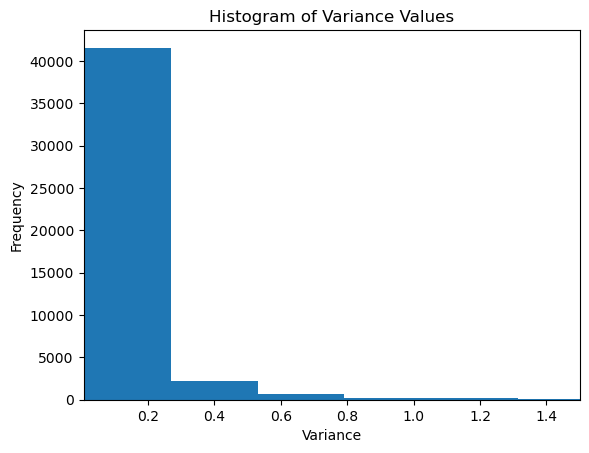

In [73]:
# Plot the histogram with 50 bins
plt.hist(variance_values, bins=50)

# Add labels and title
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.title("Histogram of Variance Values")
plt.xlim(0.0065, 1.5)

# Show the plot
plt.show()